<a href="https://colab.research.google.com/github/ANUJANAPHADE/Web_dev/blob/main/Loan_Prediction_Criteria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Prediction criteria

Dataset of this project :- https://drive.google.com/drive/folders/1X2oyQZbe2khCobJsdZLPm4ow6gsuGTbZ?usp=sharing

Google drive folder link for this project :- https://drive.google.com/drive/folders/1Nf_TUI3dVwiVNFSDx60zsh71QVsrpTc1?usp=sharing

## Import Libraries

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## Data Loading

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Project1/LoanPrediction/dataset/data.xlsx")

## Data Preprocessing

In [ ]:
print(len(data))

2456


In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.count()

Loan_ID              2456
Gender               2404
Married              2444
Dependents           2396
Education            2456
Self_Employed        2328
ApplicantIncome      2456
CoapplicantIncome    2456
LoanAmount           2368
Loan_Amount_Term     2400
Credit_History       2256
Property_Area        2456
Loan_Status          2456
dtype: int64

## Datatypes of the Features

In [ ]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
del data["Loan_ID"]

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Nullvalues analysis

In [ ]:
data.isnull().sum()

Gender                52
Married               12
Dependents            60
Education              0
Self_Employed        128
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            88
Loan_Amount_Term      56
Credit_History       200
Property_Area          0
Loan_Status            0
dtype: int64

In [ ]:
data["LoanAmount"] = data["LoanAmount"].fillna(0)
data["Dependents"] = data["Dependents"].fillna(0)
data["Loan_Amount_Term"] = data["Loan_Amount_Term"].fillna(0)
data["Credit_History"] = data["Credit_History"].fillna(0)

In [ ]:
data.isnull().sum()

Gender                52
Married               12
Dependents             0
Education              0
Self_Employed        128
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
dtype: int64

## Visualization - 1 Pie chart

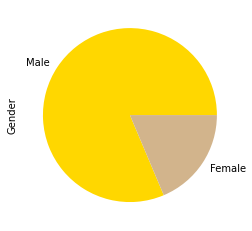

In [ ]:
Gender = data["Gender"].value_counts()
color = ["gold", "tan"]
Gender.plot.pie(colors = color)

## Visualization - 2 Bar chart

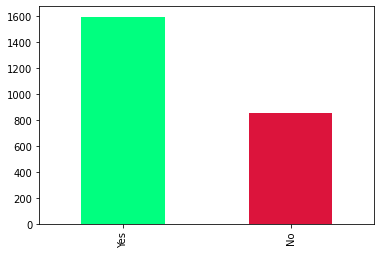

In [ ]:
married = data["Married"].value_counts()
married.plot.bar(color = ['springgreen', 'crimson'])

## Visualization - 3 Bar chart

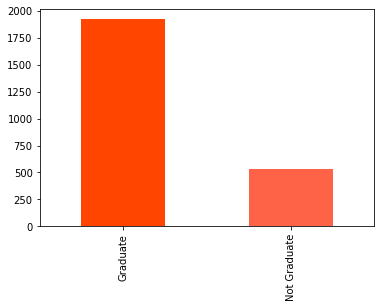

In [ ]:
Education = data["Education"].value_counts()
Education.plot.bar(color = ["orangered", "tomato"])

## Visualization - 4 Horizondal bar chart

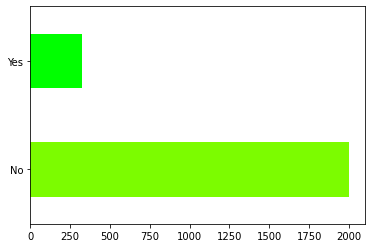

In [ ]:
self_employed = data["Self_Employed"].value_counts()
self_employed.plot.barh(color = ["lawngreen", "lime"])

In [ ]:
data["Property_Area"].value_counts()

Semiurban    932
Urban        808
Rural        716
Name: Property_Area, dtype: int64

## Visualization - 5 plot graph

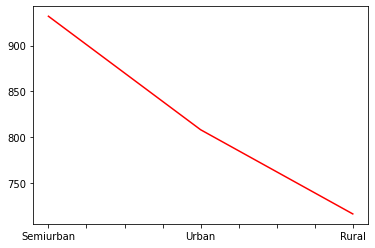

In [ ]:
property_area = data["Property_Area"].value_counts()
property_area.plot(color = "red")

## Visualization - 7 Pie chart

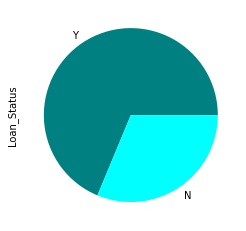

In [ ]:
target = data["Loan_Status"].value_counts()
color = ["teal", "aqua"]
target.plot.pie(colors = color)

## Visualization - 8 Pie chart

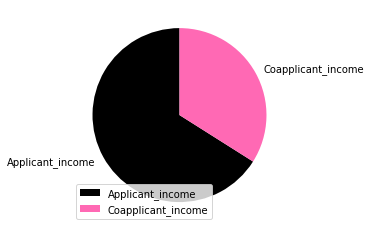

In [ ]:
maximum_applicantincome = data["ApplicantIncome"].max()
maximum_coapplicantincome = int(data["CoapplicantIncome"].max())
label_1 = np.array([maximum_applicantincome, maximum_coapplicantincome])
label_2 = ["Applicant_income", "Coapplicant_income"]
mycolors = ["black", "hotpink"]

plt.pie(label_1, labels = label_2, colors = mycolors, startangle = 90)
plt.legend()
plt.show()

In [ ]:
data["Gender"] = data["Gender"].fillna(0)
data["Married"] = data["Married"].fillna(0)
data["Self_Employed"] = data["Self_Employed"].fillna(0)

In [ ]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
for i in data.columns:
    print(i)
print(len(i))

Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status
11


In [ ]:
data['Dependents'] = data['Dependents'].replace(["3+"],3)

## String values to numeric values conversion

In [ ]:
loan_status_numbers = {'Y': 1,'N': 0}
data.Loan_Status = [loan_status_numbers[item] for item in data.Loan_Status]

In [ ]:
data.Gender[data.Gender == 'Male'] = 1
data.Gender[data.Gender == 'Female'] = 2

In [ ]:
data.Married[data.Married == 'Yes'] = 1
data.Married[data.Married == 'No'] = 2

In [ ]:
data.Education[data.Education == "Graduate"] = 1
data.Education[data.Education == "Not Graduate"] = 0

In [ ]:
data.Self_Employed[data.Self_Employed == "Yes"] = 1
data.Self_Employed[data.Self_Employed == "No"] = 0

In [ ]:
data.Property_Area[data.Property_Area == "Rural"] = 0
data.Property_Area[data.Property_Area == "Semiurban"] = 1
data.Property_Area[data.Property_Area == "Urban"] = 2

In [ ]:
x_data = data.iloc[:, data.columns != "Loan_Status"]
y_data = data.iloc[:, data.columns == "Loan_Status"]

In [ ]:
x_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,2,0,1,0,5849,0.0,0.0,360.0,1.0,2
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,2,0,1,0,6000,0.0,141.0,360.0,1.0,2


## Object datatype into integer datatype conversion

In [ ]:
x_data['Gender'] = x_data['Gender'].astype('int32')
x_data['Married'] = x_data['Married'].astype('int32')
x_data['Dependents'] = x_data['Dependents'].astype('int32')
x_data['Education'] = x_data['Education'].astype('int32')
x_data['Self_Employed'] = x_data['Self_Employed'].astype('int32')
x_data['Property_Area'] = x_data['Property_Area'].astype('int32')

## Married and Non-married males and females

In [ ]:
Married_count =  x_data.groupby(['Gender', "Married"],as_index=False).Married.count()[2:8]
Married_count.drop([2, 5], inplace=True)
print(Married_count)

   Gender  Married
3       1     1428
4       1      520
6       2      124
7       2      320


## Graduated and Non-graduated males and females with respect to thier martial status

In [ ]:
Education_count =  x_data.groupby(['Gender','Married'],as_index=False).Education.count()[3:8]
Education_count.drop(5, inplace=True)


print(Education_count)

   Gender  Married  Education
3       1        1       1428
4       1        2        520
6       2        1        124
7       2        2        320


## The maximum loan amount of males and females

In [ ]:
maximum_loan_amount = x_data.groupby(['Gender'], as_index=False).LoanAmount.max()[1:3]
print(maximum_loan_amount)

   Gender  LoanAmount
1       1       650.0
2       2       600.0


## The Specifications of Maximum Applicantincome

In [ ]:
max_income_id = data[['ApplicantIncome']].idxmax()
data.iloc[max_income_id]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,1,1,3,1,0,81000,0.0,360.0,360.0,0.0,0,0


## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x_data, y_data, test_size=0.2)

In [ ]:
xtrain.shape

(1964, 11)

In [ ]:
xtest.shape

(492, 11)

In [ ]:
ytrain.shape

(1964, 1)

In [ ]:
ytest.shape

(492, 1)

## Model name : ANN (Artificial Neural Network)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(11, input_dim=11, activation="relu"))
model.add(Dense(11, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

## Model Building

In [ ]:
model.fit(xtrain, ytrain, epochs=50, batch_size=30)

Epoch 1/50
66/66 [==============================] - 1s 1ms/step - loss: 80.4886 - accuracy: 0.5993
Epoch 2/50
66/66 [==============================] - 0s 1ms/step - loss: 39.2188 - accuracy: 0.5784
Epoch 3/50
66/66 [==============================] - 0s 1ms/step - loss: 11.3471 - accuracy: 0.5891
Epoch 4/50
66/66 [==============================] - 0s 1ms/step - loss: 7.7616 - accuracy: 0.5840
Epoch 5/50
66/66 [==============================] - 0s 2ms/step - loss: 6.3442 - accuracy: 0.5937
Epoch 6/50
66/66 [==============================] - 0s 1ms/step - loss: 4.1120 - accuracy: 0.6064
Epoch 7/50
66/66 [==============================] - 0s 2ms/step - loss: 5.1003 - accuracy: 0.6039
Epoch 8/50
66/66 [==============================] - 0s 2ms/step - loss: 4.6854 - accuracy: 0.5947
Epoch 9/50
66/66 [==============================] - 0s 2ms/step - loss: 3.3620 - accuracy: 0.6171
Epoch 10/50
66/66 [==============================] - 0s 1ms/step - loss: 4.0697 - accuracy: 0.6049
Epoch 11/50
66/6

In [ ]:
_ , Accuracy = model.evaluate(xtest, ytest)

print("Accuracy Score for test data:", Accuracy)

16/16 [==============================] - 0s 1ms/step - loss: 3.2877 - accuracy: 0.3049
Accuracy Score for test data: 0.3048780560493469


## Saving our model as pickle file

In [ ]:
model.save("model/model.h5")

## Conclusion

#### The final conclusion of our project is 'graduated' and 'married' 'males'  are showing interest to get loans. 

## **Project 1 Questions and Answers**
  
  **1.What's the ratio of Male to Female?**
     = Male has greater ratio than Female

**2. How many Males are married and unmarried?**
= Married count are greater than unmarried,married are 1428 and unmarried are 520

**3. How many Females are married and unmarried?**
= Unmarried count are greater than married,married are 124 and unmarried are 320

**4. How many Males and Females are graduated and non-graduated with respect to their Marital status?**
= Male:graduated-1423,non-graduated-520 Female:graduated-124,non-graduated-320

**5. Which type of encoding will be required to perform on the "Education" column?**
= Label encoding

**6. Is it a male or a female whose loan amount is the highest?**
= Male

**7. the specification and information about the applicant who has the highest income?**
= Married,Male and graduated

**8. Which model are you going to choose and define the reason for going with the same model?**
= ANN model because this model accept numerical type data ex.excel sheet data and give us a effective model

**9. Have you performed the Hyper Parameter Tuning?**
= Yes

**10. What's the accuracy of your model?**
= 61%

**11. In order to improve the accuracy, what more approaches can be done?**
= Take epochs value twice than the current epochs 

**12. What can you conclude with respect to the data?**
= The final conclusion of our project is ‘Married’, ‘Male’ and ‘Graduated’ are showing interest to get a loan.

                              